# Data input


In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

In [2]:
# Import files
from google.colab import files
uploaded = files.upload()

Saving Dados_RF.csv to Dados_RF.csv


In [3]:
# load the data
df = pd.read_csv('Dados_RF.csv')
df.drop(df.columns[[13,12,11,10,9]], axis = 1, inplace = True)
df.rename(columns={'Tsolo': 'ST'}, inplace=True)
df.rename(columns={'EPSA': 'WFPS'}, inplace=True)
dfa = df
variables = ['NO3', 'NH4', 'WFPS', 'ST', 'N2O']
df_mean = df.groupby(['dias', 'trat'])[variables].mean().reset_index()
df_mean_data = df_mean.copy()
df_mean.drop(df_mean.columns[[0]], axis = 1, inplace = True)

## Productivity Analysis

In [6]:
# Additional Data

# Defining treatments, crops, and production data
treatments = ['T_S', 'T_17%', 'T_46%', 'T_75%']
harvests = ['2015', '2016']
production_data = [
    [106.44, 62.92],
    [114.82, 83.94],
    [129.85, 83.05],
    [156.22, 92.78]
]

# Create the DataFrame
df = pd.DataFrame(production_data, columns=harvests, index=treatments)
# Calculate the mean values for each treatment across harvests
df['Mean'] = df.mean(axis=1)

# add yield to the dataset
df_temp = pd.DataFrame(production_data, columns=harvests, index=treatments)

# calculate the average of the two harvests
df_temp['Yield'] = df_temp.mean(axis=1)

# merge the temporary DataFrame with the original DataFrame
df = df.join(df_temp, on='treatment')

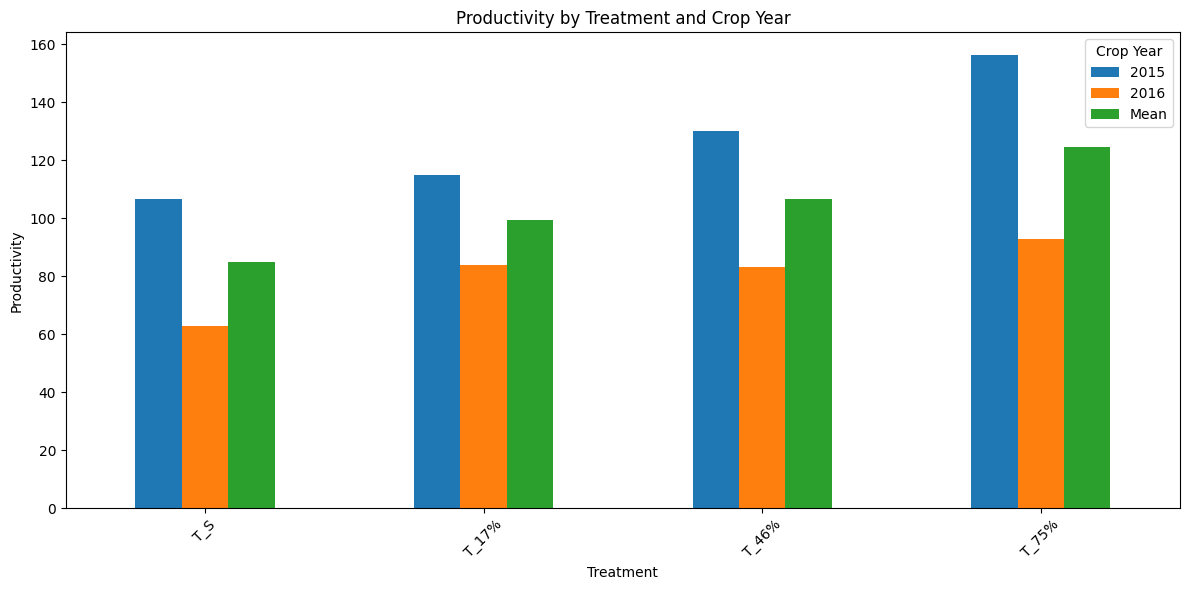

In [7]:
# Create the grouped bar chart
df.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Treatment')
plt.ylabel('Productivity')
plt.title('Productivity by Treatment and Crop Year')
plt.xticks(rotation=45)
plt.legend(title='Crop Year')
plt.tight_layout()
plt.show()

## Statistical Analysis

In [9]:
mean = df_mean.groupby(['trat'])[variables].mean().reset_index()
max = df_mean.groupby(['trat'])[variables].max().reset_index()
min = df_mean.groupby(['trat'])[variables].min().reset_index()

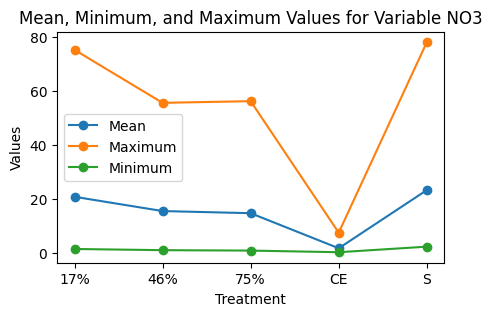

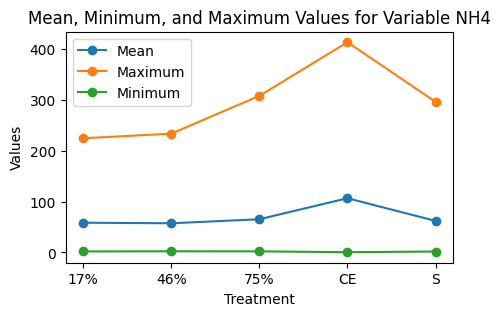

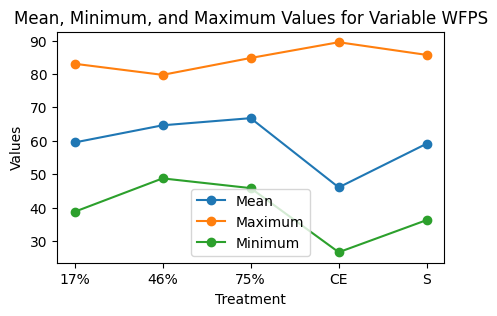

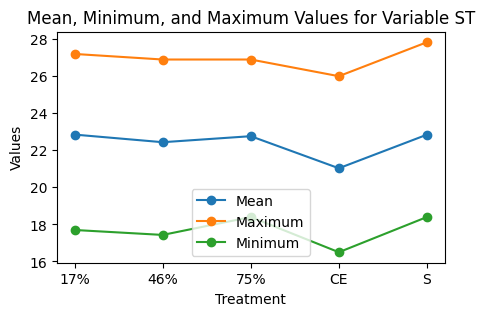

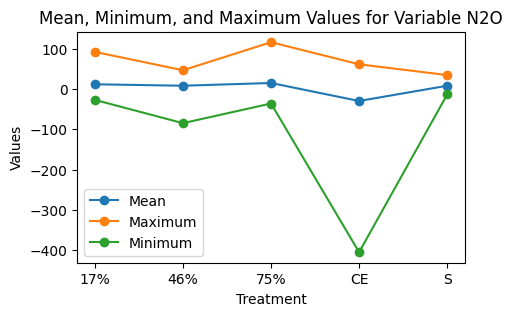

In [13]:
for variable in variables:
    plt.figure(figsize=(5, 3))

    # Filter DataFrames for the corresponding variables
    df_mean_var = mean[['trat', variable]]
    df_min_var = min[['trat', variable]]
    df_max_var = max[['trat', variable]]

    # Plot the values
    plt.plot(df_mean_var['trat'], df_mean_var[variable], marker='o', label='Mean')
    plt.plot(df_max_var['trat'], df_max_var[variable], marker='o', label='Maximum')
    plt.plot(df_min_var['trat'], df_min_var[variable], marker='o', label='Minimum')

    plt.xlabel('Treatment')
    plt.ylabel('Values')
    plt.title(f'Mean, Minimum, and Maximum Values for Variable {variable}')
    plt.legend()
    plt.show()



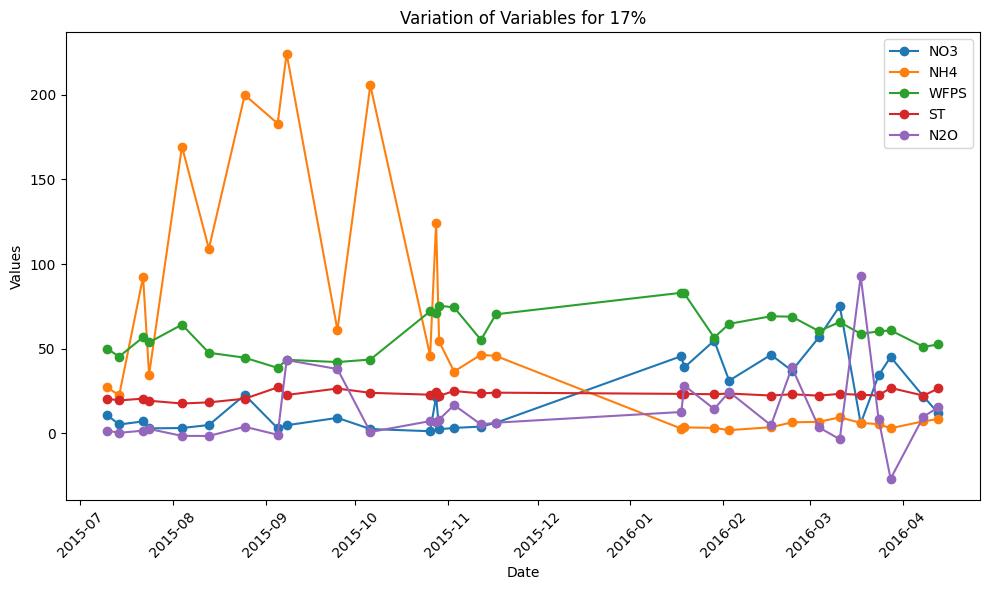

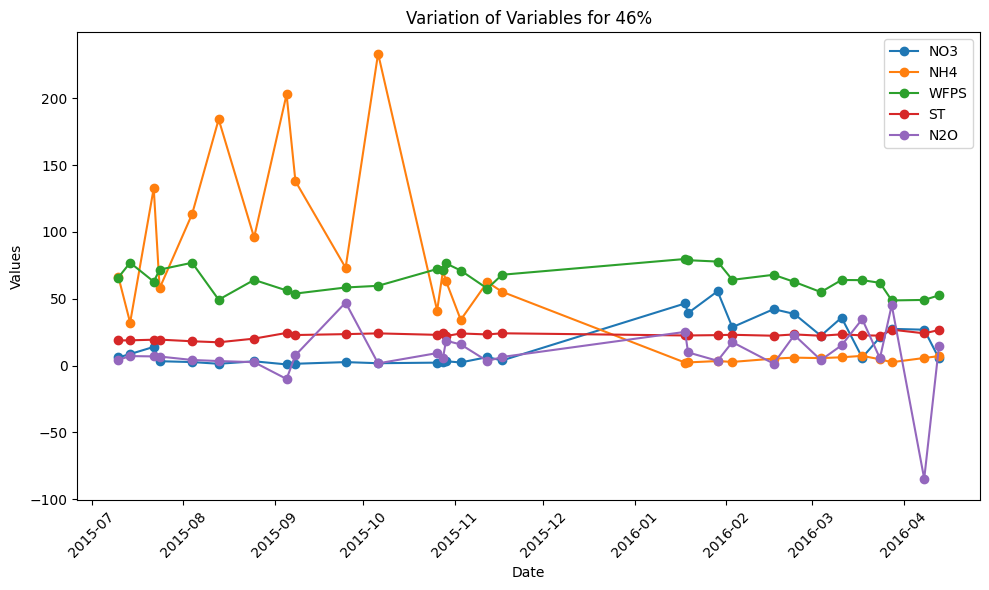

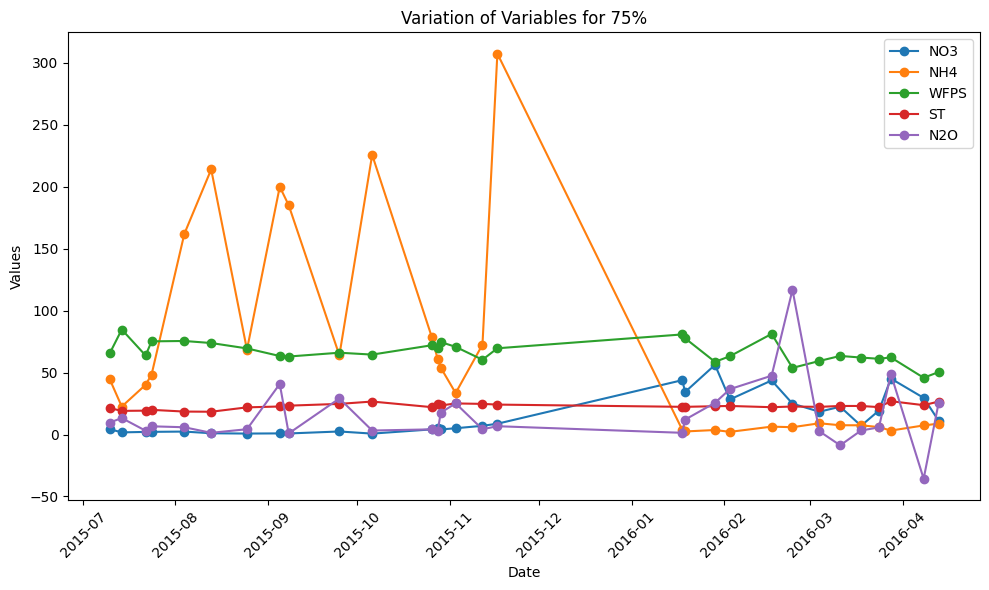

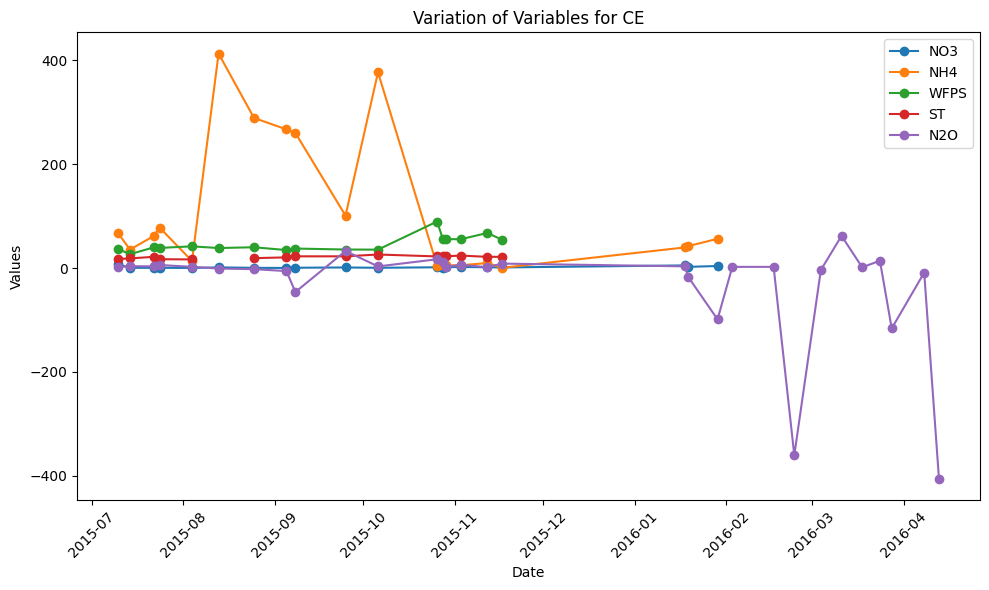

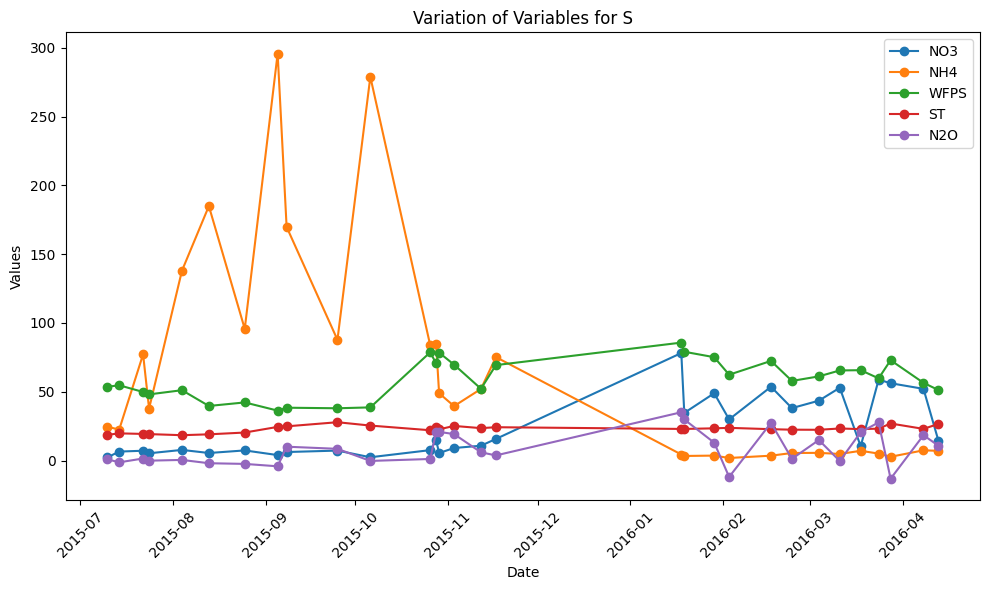

In [14]:
# Data collected plotted over time
data_start = pd.Timestamp('2015-07-10')  # Start date

# Convert days elapsed to actual dates
dias = df_mean_data['dias'].unique()
dates = [data_start + pd.Timedelta(days=d) for d in dias]

# Plot a chart for each treatment
for treat in df_mean['trat'].unique():
    plt.figure(figsize=(10, 6))

    for var in variables:
        data_subset = df_mean[df_mean['trat'] == treat]  # Filter by treatment
        plt.plot(dates, data_subset[var], marker='o', label=var)

    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.title(f'Variation of Variables for {treat}')
    plt.legend()
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

In [16]:
print("Mean")
print(mean)
print("Maximum")
print(max)
print("Minimum")
print(min)

Mean
  trat        NO3         NH4       WFPS         ST        N2O
0  17%  20.719056   58.374699  59.479064  22.847889  12.118741
1  46%  15.418011   57.279913  64.621806  22.437333   8.545185
2  75%  14.624204   65.193328  66.759634  22.762444  15.355044
3   CE   1.606116  106.495184  46.030393  21.031250 -29.409017
4    S  23.192740   61.945920  59.138860  22.843778   8.517195
Maximum
  trat        NO3         NH4       WFPS         ST         N2O
0  17%  75.279117  224.230760  83.050000  27.200000   92.695509
1  46%  55.601090  233.309873  79.723333  26.900000   47.109257
2  75%  56.225267  307.505445  84.779733  26.900000  116.802713
3   CE   7.389664  412.861900  89.495940  26.000000   61.867556
4    S  78.111567  295.752867  85.693333  27.833333   35.078229
Minimum
  trat       NO3       NH4       WFPS         ST         N2O
0  17%  1.337969  1.966688  38.721163  17.700000  -26.704053
1  46%  0.893045  2.242072  48.730000  17.433333  -84.591625
2  75%  0.738472  2.158372  45.816

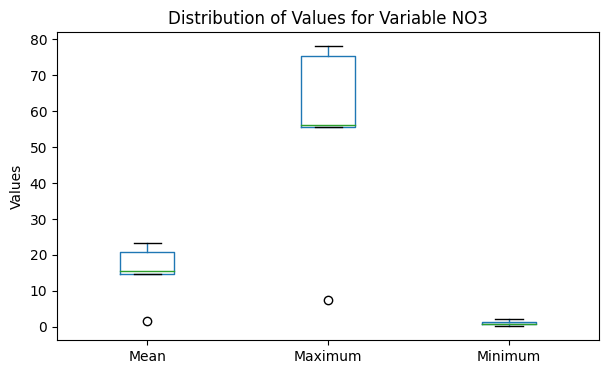

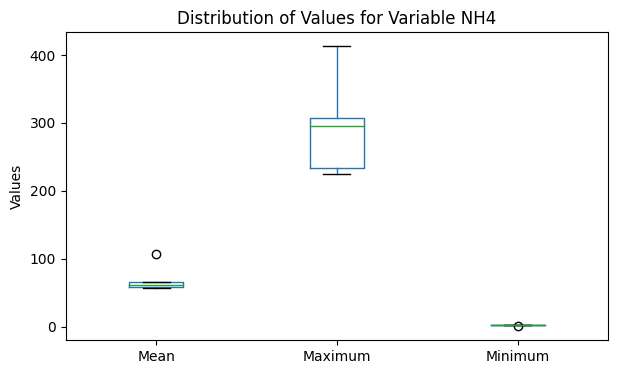

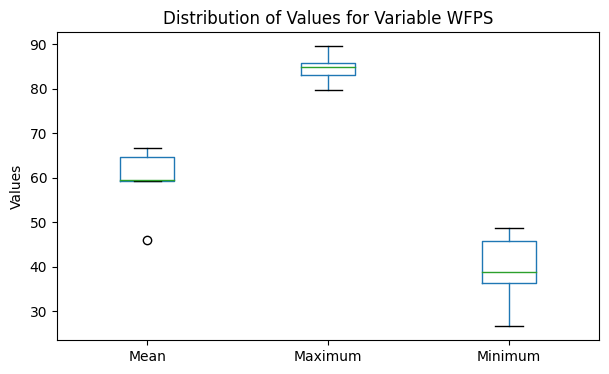

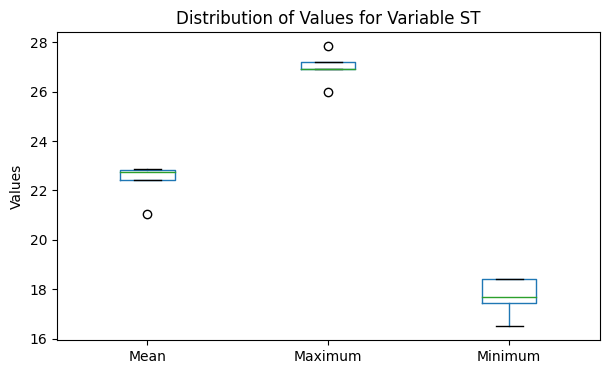

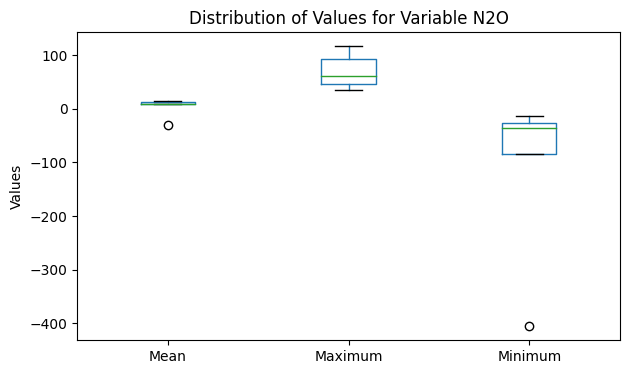

In [18]:
# Boxplots plot for each variable
for variable in variables:
    plt.figure(figsize=(7, 4))

    # Filter DataFrames for the corresponding variables
    df_mean_var = mean[[variable]]
    df_min_var = min[[variable]]
    df_max_var = max[[variable]]

    # Concatenate DataFrames to create a single DataFrame for the boxplot
    df_boxplot = pd.concat([df_mean_var, df_max_var, df_min_var], axis=1)
    df_boxplot.columns = ['Mean', 'Maximum', 'Minimum']

    # Plot the boxplot
    df_boxplot.boxplot(grid=False)

    plt.ylabel('Values')
    plt.title(f'Distribution of Values for Variable {variable}')
    plt.show()

# Data Processing

## Mean sorting (remove columns, categorical, remove max/min, groups)

In [27]:
df = df_mean

# Create binary variables to identify treatments
treatment_dummies = pd.get_dummies(df['trat'], prefix='T')

# Concatenate binary variables to the original data
df = pd.concat([df, treatment_dummies], axis=1)

# Add the yield column
df = df.join(df_temp, on='trat')

# Remove original 'Treatment' and 'Block' columns
df = df.drop(['trat'], axis=1)

# Handle null values
# df = df.fillna(0)  # Uncomment if you want to fill null values with 0
df = df.dropna()

# Display the resulting DataFrame
print(df.head())
print(df.describe())

         NO3        NH4       WFPS         ST       N2O  T_17%  T_46%  T_75%  \
0  10.804701  27.206302  50.019245  20.566667  1.726732      1      0      0   
1   6.084232  66.618572  65.876069  18.800000  4.302549      0      1      0   
2   4.302453  44.449038  65.685825  21.300000  9.700203      0      0      1   
3   7.389664  66.724500  36.454190  17.500000  2.049100      0      0      0   
4   2.198607  24.655277  53.561174  18.633333  0.943172      0      0      0   

   T_CE  T_S  
0     0    0  
1     0    0  
2     0    0  
3     1    0  
4     0    1  
              NO3         NH4        WFPS          ST         N2O       T_17%  \
count  136.000000  136.000000  136.000000  136.000000  136.000000  136.000000   
mean    16.458987   65.168390   60.617895   22.523848   10.152427    0.220588   
std     18.885593   82.029269   13.253754    2.408087   20.311936    0.416176   
min      0.132533    0.425449   26.623160   16.500000  -84.591625    0.000000   
25%      2.477588    5.5

In [28]:
# Define the desired number of groups
num_groups = 5

# Create the groups
df['N2Ogroup1'], intervals = pd.cut(df['N2O'], bins=num_groups, labels=False, retbins=True)

# Display the data with assigned groups
print(df)

# Display the intervals for each group
for i, interval in enumerate(intervals[:-1]):
    print(f"Group {i+1}: {interval} - {intervals[i+1]}")


           NO3        NH4       WFPS         ST        N2O  T_17%  T_46%  \
0    10.804701  27.206302  50.019245  20.566667   1.726732      1      0   
1     6.084232  66.618572  65.876069  18.800000   4.302549      0      1   
2     4.302453  44.449038  65.685825  21.300000   9.700203      0      0   
3     7.389664  66.724500  36.454190  17.500000   2.049100      0      0   
4     2.198607  24.655277  53.561174  18.633333   0.943172      0      0   
..         ...        ...        ...        ...        ...    ...    ...   
144  52.083730   7.411263  56.453333  22.990000  18.405473      0      0   
145  11.907097   8.529899  52.534067  26.600000  15.439647      1      0   
146   5.372652   7.105572  52.543333  26.600000  14.463557      0      1   
147  11.258300   8.783513  50.396667  26.600000  25.318474      0      0   
149  14.345987   7.043036  51.213333  26.600000  10.733254      0      0   

     T_75%  T_CE  T_S  N2Ogroup1  
0        0     0    0          2  
1        0     0 

In [29]:
# Define the desired number of groups
num_groups = 5

# Create groups with equal interval range
df['N2Ogroup2'], intervals = pd.qcut(df['N2O'], q=num_groups, labels=False, retbins=True)

# Display the data with assigned groups
print(df)

# Display the intervals for each group
for i in range(num_groups):
    print(f"Group {i+1}: {intervals[i]} - {intervals[i+1]}")


           NO3        NH4       WFPS         ST        N2O  T_17%  T_46%  \
0    10.804701  27.206302  50.019245  20.566667   1.726732      1      0   
1     6.084232  66.618572  65.876069  18.800000   4.302549      0      1   
2     4.302453  44.449038  65.685825  21.300000   9.700203      0      0   
3     7.389664  66.724500  36.454190  17.500000   2.049100      0      0   
4     2.198607  24.655277  53.561174  18.633333   0.943172      0      0   
..         ...        ...        ...        ...        ...    ...    ...   
144  52.083730   7.411263  56.453333  22.990000  18.405473      0      0   
145  11.907097   8.529899  52.534067  26.600000  15.439647      1      0   
146   5.372652   7.105572  52.543333  26.600000  14.463557      0      1   
147  11.258300   8.783513  50.396667  26.600000  25.318474      0      0   
149  14.345987   7.043036  51.213333  26.600000  10.733254      0      0   

     T_75%  T_CE  T_S  N2Ogroup1  N2Ogroup2  
0        0     0    0          2         

0      2
1      8
2    115
3      9
4      2
Name: N2Ogroup1, dtype: int64


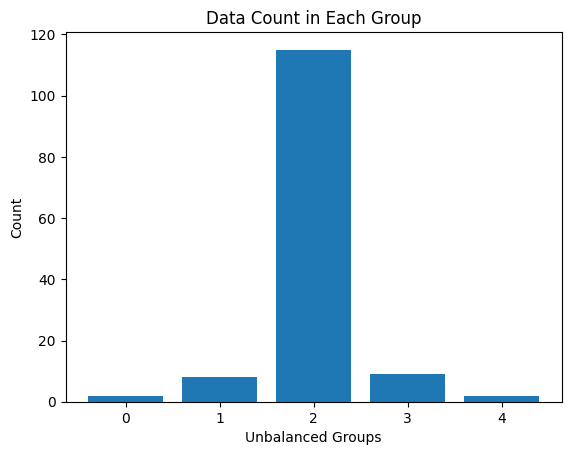

In [34]:
# Get the count of values in each group
count = df['N2Ogroup1'].value_counts().sort_index()
#count = df['N2Ogroup2'].value_counts().sort_index()

# Display the count of values in each group
print(count)

# Plot the count of values in each group
plt.bar(count.index, count.values)
plt.xlabel('Unbalanced Groups')
plt.ylabel('Count')
plt.title('Data Count in Each Group')
plt.show()


# Machine learning algorithms


## Random Forest


### Random Forest for averages


In [46]:
# Loop through each block

# Separate input (X) and output (Y) variables
X = df.drop(['N2O', 'N2Ogroup1', 'N2Ogroup2'], axis=1).values
#Y = df['N2O'].values
#Y = df['N2Ogroup1'].values
Y = df['N2Ogroup2'].values

# Create a new Random Forest model for the current block
model = RandomForestRegressor()

# Train the model using the data from the current block
model.fit(X, Y)

RandomForestRegressor()

In [47]:
# Make predictions for the current block using the corresponding model
predictions = model.predict(X)

# Calculate evaluation metrics for the current model
mae = mean_absolute_error(Y, predictions)
mse = mean_squared_error(Y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(Y, predictions)

# Print the results
print("Results for the mean:")
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R²):', r2)
print()

Results for the mean:
Mean Absolute Error (MAE): 0.39669117647058827
Mean Squared Error (MSE): 0.2598904411764706
Root Mean Squared Error (RMSE): 0.50979450877434
R-squared (R²): 0.8709894363929147



TypeError: ignored

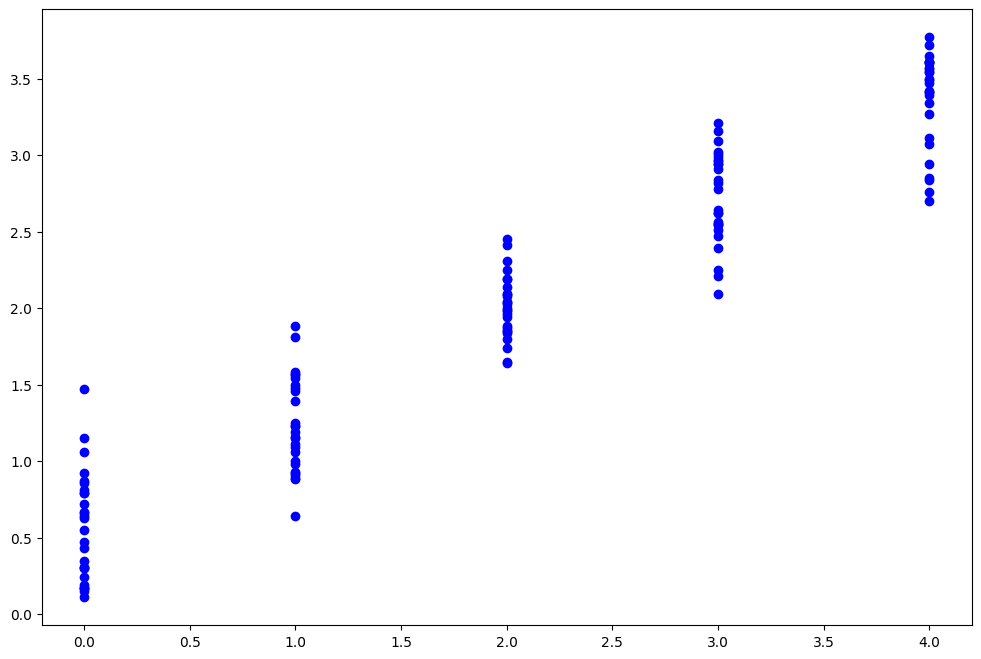

In [48]:
# Create the plot
plt.figure(figsize=(12, 8))

# Plot the observed vs. predicted data by Random Forest
plt.scatter(Y, predictions, label='Random Forest Predicted', color='blue', marker='o')

# Fit a linear trendline using polyfit
coefficients = np.polyfit(Y, predictions, 1)
trendline_x = np.array([min(Y), max(Y)])
trendline_y = coefficients[0] * trendline_x + coefficients[1]

# Plot the trendline
plt.plot(trendline_x, trendline_y, label='Trendline', color='red', linestyle='--')

# Set axes and titles
plt.xlabel('Observed N2O Fluxes')
plt.ylabel('Random Forest Predicted N2O Fluxes')

plt.title('Observed vs. Random Forest Predicted N2O Fluxes')
plt.legend()

# Show the plot
plt.show()


In [ ]:
data_start = pd.Timestamp('2015-07-10')

# Converter dias corridos para datas
dates = [data_start + pd.Timedelta(days=d) for d in df_mean_data['dias'].unique()]

# Plotar um gráfico para cada tratamento
for treat in df_mean['trat'].unique():
    plt.figure(figsize=(10, 6))

    ['N2O', 'N2O_RF']:
    data_subset = df_mean[df_mean['trat'] == treat]
    Y_subset =
    plt.plot(dates, data_subset['N2O'], marker='o', label=var)
    plt.plot(dates, data_subset[var], marker='o', label=var)

    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.title(f'N2O Original vs. N2O RF Prediction for {treat}')
    plt.legend()
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()



    data_start = pd.Timestamp('2015-07-10')  # Start date

# Convert days elapsed to actual dates
dias = df_mean_data['dias'].unique()
dates = [data_start + pd.Timedelta(days=d) for d in dias]



# Plot a graph for each treatment
for treat in df_mean['trat'].unique():
    plt.figure(figsize=(10, 6))

    for var in variables:
        data_subset = df_mean[df_mean['trat'] == treat]  # Filtrar por tratamento
        plt.plot(dates, data_subset[var], marker='o', label=var)

    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.title(f'Variation of Variables for {treat}')
    plt.legend()
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()



AttributeError: ignored

### Gráfico de incremento e decreciemnto

In [ ]:
X_bloco_df = df.drop([ 'N2O', 'N2Ogrupo1', 'N2Ogrupo2', '2015', '2016'], axis=1)
X_bloco = X_bloco_df.values
Y_bloco_df = df['N2O']
Y_bloco = Y_bloco_df.values
porcentagem = 20
var_Y = porcentagem / 100  # Por exemplo, variação de 10%

# Configurar o layout dos gráficos
plt.figure(figsize=(12, 6))

# Configurar os eixos do gráfico
#plt.title("10% Variation")

plt.title(f"{porcentagem}% Variation")

#ax.set_ylabel("N2O [µg m−2 h−1]")
plt.ylabel(u'N\u2082O [µg m⁻² h⁻¹]')

plt.xlabel("Input Variable")

# Percorrer todas as variáveis de entrada
#variaveis_analisadas = ['NO3',	'NH4',	'EPSA',	'Tsolo',	'T_17%',	'T_46%',	'T_75%',	'T_CE',	'T_S']
variaveis_analisadas = ['NO3',	'NH4',	'WFPS',	'ST','Yield']
x_pos = range(len(variaveis_analisadas))
variacoes_alta = []
variacoes_baixa = []

crescimento = []
decrescimento = []
med_max = []
med_min = []
med = []
var = []

for variavel_analisada in variaveis_analisadas:
    # Selecionando amostras para a análise (exemplo: primeiras 3 amostras)
    amostras = X_bloco_df[:].copy()

    # Obter o índice da variável analisada
    indice_variavel = X_bloco_df.columns.get_loc(variavel_analisada)

    # Realizar a análise de variação unitária para mais e para menos
    variacoes_alta_variavel = []
    variacoes_baixa_variavel = []

        # Obter o valor máximo e mínimo da variável de entrada
    valor_maximo = X_bloco_df[variavel_analisada].max()
    valor_minimo = X_bloco_df[variavel_analisada].min()
    med.append(X_bloco_df[variavel_analisada].mean())

    # Calcular a diferença entre o máximo e o mínimo
    diferenca = valor_maximo - valor_minimo

    # Calcular a variação a ser aplicada (porcentagem da diferença)

    variacao = var_Y * diferenca

    for amostra in amostras.itertuples(index=False):
        valor_original = amostra[indice_variavel]

        # Incrementando o valor da variável de entrada em uma unidade
        amostra_alta = list(amostra)
        amostra_alta[indice_variavel] += variacao

        # Decrementando o valor da variável de entrada em uma unidade
        amostra_baixa = list(amostra)
        amostra_baixa[indice_variavel] -= variacao

        # Fazendo a previsão com os valores incrementados e decrementados
        previsao_alta = modelo.predict([amostra_alta])[0]
        previsao_baixa = modelo.predict([amostra_baixa])[0]

        # Calculando a diferença nas previsões
        variacao_alta = previsao_alta - modelo.predict([amostra])[0]
        variacao_baixa = previsao_baixa - modelo.predict([amostra])[0]

        variacoes_alta_variavel.append(variacao_alta)
        variacoes_baixa_variavel.append(variacao_baixa)

    # Calculando a média das variações para mais e para menos
    variacao_alta_media = sum(variacoes_alta_variavel) / len(variacoes_alta_variavel)
    variacao_baixa_media = sum(variacoes_baixa_variavel) / len(variacoes_baixa_variavel)

    crescimento.append(variacao_alta_media)
    decrescimento.append(variacao_baixa_media)

    print("Variação na variável ", variavel_analisada, ":", variacao)
    var.append(variacao)


 ## _______________________________Grafíco em barras________________________________________

crescimento = [round(num, 4) for num in crescimento]
decrescimento = [round(num, 4) for num in decrescimento]

atividades = ['NO\u2083 [mg kg⁻¹]', 'NH\u2084 [mg kg⁻¹]', 'WFPS [%]', 'ST [⁰C]','Yield[Mg ha−1]']

# Calcular limites automáticos
max_pos_value = max(max(crescimento), max(decrescimento))
min_neg_value = min(min(crescimento), min(decrescimento))
max_value = max(abs(max_pos_value), abs(min_neg_value))*1.07

# Calcuma o novo valor medio
med_max = np.array(med)+np.array(var)
med_min = np.array(med)-np.array(var)
med_max = [round(num, 2) for num in med_max]
med_min = [round(num, 2) for num in med_min]
med = [round(num, 2) for num in med]

# Configura do gráfico
cores_pos = '#254061'
cores_neg = '#C82900'
altura = 0.5
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico para crescimento
axs[0].barh(atividades, crescimento, height=altura, color=[cores_pos if x > 0 else cores_neg for x in crescimento])
axs[0].set_xlim(-max_value, max_value)  # Ajuste os limites para melhor visualização
axs[0].set_xlabel(u'N\u2082O [µg m⁻² h⁻¹]')
axs[0].set_title(f"{porcentagem} Percent Increase")


for i in range(len(atividades)):
    cor='white'
    temp = crescimento[i]
    desl = 1
    if -1 <= crescimento[i] <= 1 :
      temp = -2.1
      cor='black'
    axs[0].text(temp+desl, i+(1/3), str(med_max[i]), ha='right', va='center')
    axs[0].text((temp/2)+.6, i, str(crescimento[i])+'', ha='right', va='center',color=cor, fontdict={'weight': 'bold'})
    axs[0].text(-0.3, i+(1/3), str(med[i]), ha='left', va='center')

# Gráfico para decrescimento


axs[1].barh(atividades, decrescimento, height=altura, color=[cores_pos if x < 0 else cores_neg for x in decrescimento])
axs[1].set_xlim(-max_value, max_value)  # Ajuste os limites para melhor visualização
axs[1].set_xlabel(u'N\u2082O [µg m⁻² h⁻¹]')
axs[1].set_title(f"{porcentagem} Percent Decrease")

for i in range(len(atividades)):
    cor='white'
    temp = decrescimento[i]
    desl = 0
    if -1 <= decrescimento[i] <= 1 :
      temp = 1.*np.sign(decrescimento[i])
      cor='black'
      desl = 0.4*np.sign(decrescimento[i])
    axs[1].text((temp), i+(1/3), str(med_min[i]), ha='left', va='center')
    axs[1].text((temp/2)-.5+desl, i, str(decrescimento[i])+'', ha='left', va='center', color=cor, fontdict={'weight': 'bold'})
    axs[1].text(-0.3, i+(1/3), str(med[i]), ha='left', va='center')
axs[1].set_yticklabels([])
fig.suptitle('Variation in N\u2082O Predictions: Increase and Decrease of Input Variables Individually')
plt.savefig(f'{porcentagem}por_med_sep.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Extracting input variables and target variable for analysis
X_block_df = df.drop(['N2O', 'N2Ogroup1', 'N2Ogroup2', '2015', '2016'], axis=1)
X_block = X_block_df.values
Y_block_df = df['N2O']
Y_block = Y_block_df.values
percentage = 20
var_Y = percentage / 100  # For example, a variation of 20%

# Set up the layout of the graphs
plt.figure(figsize=(12, 6))

# Set up the graph axes
plt.title(f"{percentage}% Variation")
plt.ylabel(u'N\u2082O [µg m⁻² h⁻¹]')
plt.xlabel("Input Variable")

# Iterate over all input variables
analyzed_variables = ['NO3', 'NH4', 'WFPS', 'ST', 'Yield']
x_pos = range(len(analyzed_variables))
increases = []
decreases = []

growth = []
decline = []
max_values = []
min_values = []
average_values = []
variations = []

# Loop through all the input variables
for analyzed_variable in analyzed_variables:
    # Selecting samples for analysis (example: the first 3 samples)
    samples = X_block_df[:].copy()

    # Get the index of the analyzed variable
    variable_index = X_block_df.columns.get_loc(analyzed_variable)

    # Perform unitary variation analysis for both increase and decrease
    increases_variable = []
    decreases_variable = []

    # Get the maximum and minimum values of the input variable
    max_value = X_block_df[analyzed_variable].max()
    min_value = X_block_df[analyzed_variable].min()
    average_values.append(X_block_df[analyzed_variable].mean())

    # Calculate the difference between the maximum and minimum
    difference = max_value - min_value

    # Calculate the variation to be applied (percentage of the difference)
    variation = var_Y * difference

    for sample in samples.itertuples(index=False):
        original_value = sample[variable_index]

        # Incrementing the value of the input variable by one unit
        sample_increase = list(sample)
        sample_increase[variable_index] += variation

        # Decrementing the value of the input variable by one unit
        sample_decrease = list(sample)
        sample_decrease[variable_index] -= variation

        # Making predictions with the incremented and decremented values
        prediction_increase = model.predict([sample_increase])[0]
        prediction_decrease = model.predict([sample_decrease])[0]

        # Calculating the difference in predictions
        increase_variation = prediction_increase - model.predict([sample])[0]
        decrease_variation = prediction_decrease - model.predict([sample])[0]

        increases_variable.append(increase_variation)
        decreases_variable.append(decrease_variation)

    # Calculating the average variations for increase and decrease
    increase_average = sum(increases_variable) / len(increases_variable)
    decrease_average = sum(decreases_variable) / len(decreases_variable)

    growth.append(increase_average)
    decline.append(decrease_average)

    print("Variation in variable ", analyzed_variable, ":", variation)
    variations.append(variation)

# Automatic limit calculation
max_pos_value = max(max(growth), max(decline))
min_neg_value = min(min(growth), min(decline))
max_value = max(abs(max_pos_value), abs(min_neg_value)) * 1.07

# Calculate the new average value
max_values = np.array(average_values) + np.array(variations)
min_values = np.array(average_values) - np.array(variations)
max_values = [round(num, 2) for num in max_values]
min_values = [round(num, 2) for num in min_values]
average_values = [round(num, 2) for num in average_values]

# Configure the graph
pos_colors = '#254061'
neg_colors = '#C82900'
height = 0.5
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Graph for growth
axs[0].barh(analyzed_variables, growth, height=height, color=[pos_colors if x > 0 else neg_colors for x in growth])
axs[0].set_xlim(-max_value, max_value)  # Adjust the limits for better visualization
axs[0].set_xlabel(u'N\u2082O [µg m⁻² h⁻¹]')
axs[0].set_title(f"{percentage} Percent Increase")

for i in range(len(analyzed_variables)):
    color = 'white'
    temp = growth[i]
    shift = 1
    if -1 <= growth[i] <= 1:
        temp = -2.1
        color = 'black'
    axs[0].text(temp + shift, i + (1 / 3), str(max_values[i]), ha='right', va='center')
    axs[0].text((temp / 2) + .6, i, str(growth[i]) + '', ha='right', va='center', color=color,
                fontdict={'weight': 'bold'})
    axs[0].text(-0.3, i + (1 / 3), str(average_values[i]), ha='left', va='center')

# Graph for decline
axs[1].barh(analyzed_variables, decline, height=height, color=[pos_colors if x < 0 else neg_colors for x in decline])
axs[1].set_xlim(-max_value, max_value)  # Adjust the limits for better visualization
axs[1].set_xlabel(u'N\u2082O [µg m⁻² h⁻¹]')
axs[1].set_title(f"{percentage} Percent Decrease")

for i in range(len(analyzed_variables)):
    color = 'white'
    temp = decline[i]
    shift = 0
    if -1 <= decline[i] <= 1:
        temp = 1. * np.sign(decline[i])
        color = 'black'
        shift = 0.4 * np.sign(decline[i])
    axs[1].text((temp), i + (1 / 3), str(min_values[i]), ha='left', va='center')
    axs[1].text((temp / 2) - .5 + shift, i, str(decline[i]) + '', ha='left', va='center', color=color,
                fontdict={'weight': 'bold'})
    axs[1].text(-0.3, i + (1 / 3), str(average_values[i]), ha='left', va='center


### Count of Variables at the Root

In [ ]:
# Initialize a dictionary to store the count of variables
variable_count = {}

# Iterate through each tree in the model
for tree in model.estimators_:
    root_variable = tree.tree_.feature[0]  # Get the variable used at the root of the tree
    if root_variable != -2:  # -2 indicates a leaf, so ignore
        if root_variable in variable_count:
            variable_count[root_variable] += 1
        else:
            variable_count[root_variable] = 1

# Display the count of variables at the root of each tree
for variable, count in variable_count.items():
    print(f'Variable {variable}: Used {count} times at the root of the trees.')

Variável 2: 40 vezes na raiz das árvores.
Variável 3: 25 vezes na raiz das árvores.
Variável 1: 31 vezes na raiz das árvores.
Variável 0: 4 vezes na raiz das árvores.


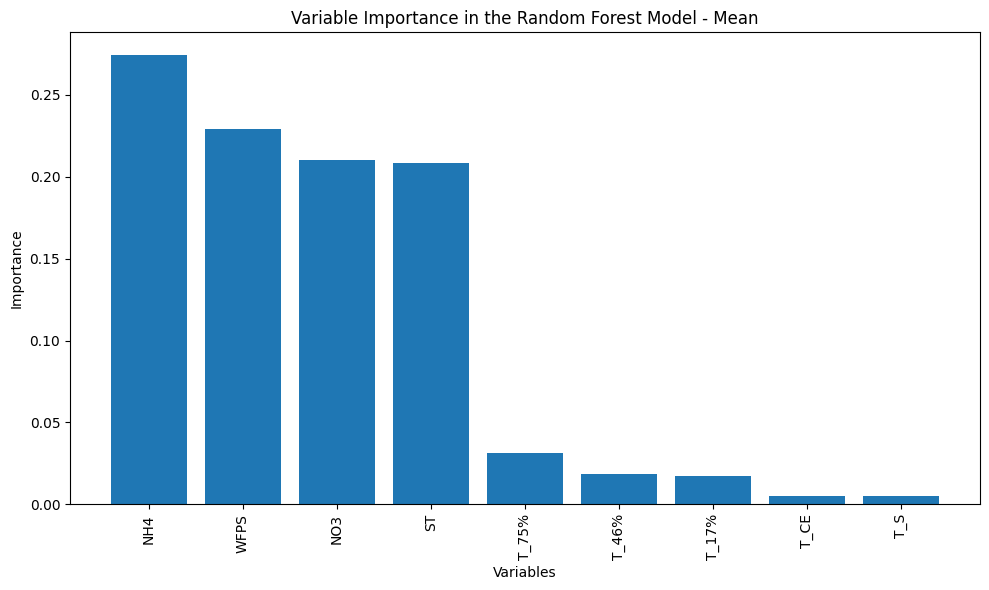

In [ ]:
# Getting the importance of variables in the RF model
importances = model.feature_importances_

# Getting the order of variables in descending order of importance
indices = np.argsort(importances)[::-1]

# Getting the names of variables in order corresponding to importance
variable_names = [block_data.drop(['N2O', 'N2Ogroup1', 'N2Ogroup2'], axis=1).columns[i] for i in indices]

# Creating a bar graph to visualize the importance of variables
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), variable_names, rotation=90)
plt.xlabel('Variables')
plt.ylabel('Importance')
plt.title(f'Variable Importance in the Random Forest Model - Mean')
plt.tight_layout()
plt.show()

### Random Forest tree

In [ ]:
# Selecting a Tree from the Random Forest Model
tree = rf_model.estimators_[0]  # Selects the first tree, replace the index as needed

# Plotting the Decision Tree
plt.figure(figsize=(100, 100))
plot_tree(tree, filled=True, feature_names=X.columns)
plt.show()

_____________________________________________________________

##  Generalized Regression Neural Network (GRNN)

In [ ]:
# installation of neurolab
!pip install neurolab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.3/645.3 kB 34.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for neurolab: filename=neurolab-0.3.5-py3-none-any.whl size=22180 sha256=2b38640a9d3f89f2fb337f8592f5ce01e3917ccc3147121eef1be0d22f20c313
  Stored in directory: /root/.cache/pip/wheels/1d/c0/44/7142fa43c89473c5e63a750a00224e5f9ec9ca80613de1f97d
Successfully built neurolab


In [ ]:
import neurolab as nl

# Prepare the input (X) and output (Y) data
X = df.drop(['days', 'Block_3', 'Block_2', 'Block_1', 'date', 'N2O', 'N2Ogroup1', 'N2Ogroup2'], axis=1).values
Y = df['N2Ogroup1'].values

# Normalize the input data (optional)
X = (X - X.min()) / (X.max() - X.min()) - 0.5

# Create a new feedforward neural network
myNN = nl.net.newff([[-0.5, 0.5], [-0.5, 0.5], [-0.5, 0.5], [-0.5, 0.5], [-0.5, 0.5], [-0.5, 0.5], [-0.5, 0.5], [-0.5, 0.5], [-0.5, 0.5]], [5, 1])

# Train the neural network
myNN.train(X, Y, show=15)

# Create the GRNN (Generalized Regression Neural Network)
grnn = nl.net.newgrnn(X, Y)

# Make predictions for new data
predictions = grnn.sim(X)

# Plot the results
plt.plot(Y, label='Real Data')
plt.plot(predictions, label='Predictions')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.title('GRNN Results')
plt.show()


AssertionError: ignored

Epoch: 5; Error: 585.0058238986064;
Epoch: 10; Error: 585.0004353849904;
Epoch: 15; Error: 585.0000253674737;


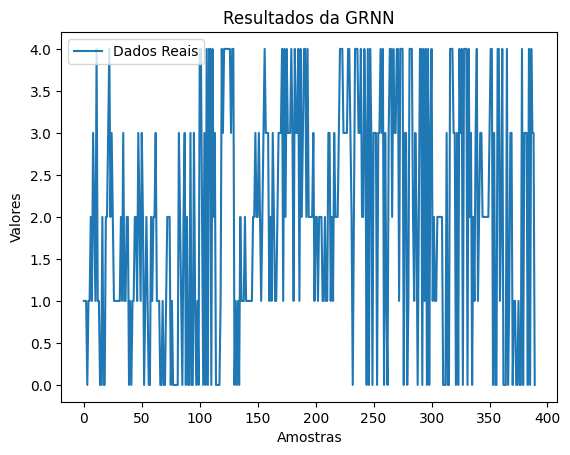

In [ ]:
import neurolab as nl
import matplotlib.pyplot as plt

# Prepare input (X) and output (Y) data
X = df.drop(['days', 'Block_3', 'Block_2', 'Block_1', 'date', 'N2O', 'N2Ogroup1', 'N2Ogroup2'], axis=1).values
Y = df['N2Ogroup2'].values

# Normalize input data (optional)
X = (X - X.min()) / (X.max() - X.min()) - 0.5

# Reshape output data
Y = Y.reshape(-1, 1)

# Create the neural network
myNN = nl.net.newff([[-0.5, 0.5], [-0.5, 0.5], [-0.5, 0.5], [-0.5, 0.5], [-0.5, 0.5], [-0.5, 0.5], [-0.5, 0.5], [-0.5, 0.5], [-0.5, 0.5]], [15, 10, 1])

# Train the neural network
grnn = myNN.train(X, Y, show=5)

# Make predictions for new data
predictions = myNN.sim(X)

# Plot the results
plt.plot(Y, label='Real Data')
# plt.plot(predictions, label='Predictions')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.title('GRNN Results')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model predictions
y_pred = myNN.sim(X)

# Calculate metrics
mae = mean_absolute_error(Y, y_pred)
mse = mean_squared_error(Y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y, y_pred)

# Display metrics
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R²):', r2)

Mean Absolute Error (MAE): 1.4000000055549042
Mean Squared Error (MSE): 3.0000000184952382
Root Mean Squared Error (RMSE): 1.7320508129079926
R-squared (R²): -0.5000000092476191


## Radial basis function neural network (RBFNN)


In [ ]:
!pip install pyRBF

In [ ]:
import pyRBF

# Prepare input (X) and output (Y) data
X = df.drop(['days', 'Block_3', 'Block_2', 'Block_1', 'date', 'N2O', 'N2Ogroup1', 'N2Ogroup2'], axis=1).values
Y = df['N2Ogroup1'].values

# Normalize input data (optional)
X = (X - X.min()) / (X.max() - X.min()) - 0.5

# Create the RBFNN
input_shape = X.shape[1]
output_shape = 1
hidden_shape = 10  # Number of neurons in the hidden layer

rbfnn = pyRBF.RBFNetwork(input_shape, hidden_shape, output_shape)

# Train the RBFNN
rbfnn.train(X, Y, epochs=100, learning_rate=0.1)

# Make predictions for new data
predictions = rbfnn.sim(X)

# Plot the results
plt.plot(Y, label='Real Data')
# plt.plot(predictions, label='Predictions')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.title('RBFNN Results')
plt.show()

## Perceptron

In [ ]:
#SLP using Perceptron class


from sklearn.linear_model import Perceptron
#load iris datasets

X = df.drop(['dias','Bloco_3','Bloco_2','Bloco_1','data', 'N2O','N2Ogrupo1','N2Ogrupo2'], axis=1)
y = df['N2Ogrupo2']

# instance of a perceptron: SLP with perceptron rule
# learning rate =0.1, maximum of epoch = 5000, without shuffle after
# each iteration
mySLP = Perceptron(eta0=0.1, max_iter=5000,tol=1e-3,shuffle=False)
mySLP.fit(X, y)
print ("The score of the classification (without shuffle) = ", mySLP.score(X, y) )

# instance of an other perceptron: SLP with perceptron rule
# learning rate =0.1, maximum of epoch = 20, with shuffle after
# each iteration
mySLPShuf = Perceptron(eta0=0.1, max_iter=20,tol=1e-3,shuffle=True)
mySLPShuf.fit(X, y)
print ("The score of the classification (with shuffle) = ", mySLPShuf.score(X, y) )


The score of the classification (without shuffle) =  0.2205128205128205
The score of the classification (with shuffle) =  0.2641025641025641


In [ ]:
from sklearn.linear_model import SGDClassifier
#SLP using SGDClassifier class
mySGDCl = SGDClassifier(loss="perceptron", learning_rate="constant", eta0=0.1,penalty = "l2",
                        max_iter=20, shuffle= True,tol=1e-3, verbose=2,random_state=0
                       )
mySGDCl.fit(X, y)

print ("The score of the classification (with shuffle) = ", mySGDCl.score(X, y) )

print("The number of classes = ", len(mySGDCl.classes_))

-- Epoch 1
Norm: 31.25, NNZs: 9, Bias: 0.200000, T: 390, Avg. loss: 278.583813
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 17.28, NNZs: 9, Bias: 0.100000, T: 780, Avg. loss: 369.887536
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 15.62, NNZs: 9, Bias: 0.400000, T: 1170, Avg. loss: 394.021176
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 18.54, NNZs: 9, Bias: 0.700000, T: 1560, Avg. loss: 360.089366
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 26.33, NNZs: 9, Bias: 0.900000, T: 1950, Avg. loss: 290.428229
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 31.02, NNZs: 9, Bias: 1.000000, T: 2340, Avg. loss: 272.000081
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 35.46, NNZs: 9, Bias: 1.100000, T: 2730, Avg. loss: 367.780813
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 39.45, NNZs: 9, Bias: 1.300000, T: 3120, Avg. loss: 332.882660
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 44.30, NNZs: 9, Bias: 1.100000, T: 3510, Avg. loss: 334.129687
To

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


##MLP

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# List to store trained models
model_blocks = []
best_model_blocks = []
# Define the number of blocks
num_blocks = 3
# Define the values of hyperparameters to be tested
parameters = {
    'hidden_layer_sizes': [(50, 50, 5), (100, 100, 5)],
    'activation': ['tanh'],
    'solver': ['adam'],
    'learning_rate': ['constant'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [2000],
}

# Loop through each block
for block in range(1, num_blocks + 1):
    # Filter data corresponding to the current block
    block_data = df[df['block'] == block]

    # Separate input (X) and output (Y) variables
    X_block = block_data.drop(['days', 'block', 'Block_3', 'Block_2', 'Block_1', 'date', 'N2O', 'N2Ogroup1', 'N2Ogroup2'],
                              axis=1).values
    Y_block = block_data['N2Ogroup2'].values

    # Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X_block, Y_block, test_size=0.2, random_state=42)

    # Create the MLP model
    mlp = MLPRegressor(random_state=42)

    # Perform grid search to find the best hyperparameters
    grid_search = GridSearchCV(mlp, parameters, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, Y_train)

    # Print the best hyperparameters found
    print("Best parameters:", grid_search.best_params_)

    best_model = grid_search.best_estimator_
    best_model_blocks.append(grid_search.best_params_)
    # Add the trained model to the list
    model_blocks.append(best_model)

    # Make predictions on the test set
    Y_pred = best_model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, Y_pred)

    # Display metrics
    print('Mean Absolute Error (MAE):', mae)
    print('Mean Squared Error (MSE):', mse)
    print('Root Mean Squared Error (RMSE):', rmse)
    print('R-squared (R²):', r2)

# Print consolidated metrics
print("Consolidated metrics for all blocks:")
for i, model in enumerate(model_blocks):
    block_data = df[df['block'] == i + 1]
    X_block = block_data.drop(['days', 'block', 'Block_3', 'Block_2', 'Block_1', 'date', 'N2O', 'N2Ogroup1', 'N2Ogroup2'],
                               axis=1).values
    Y_block = block_data['N2Ogroup2'].values
    Y_pred = model.predict(X_block)

    mae = mean_absolute_error(Y_block, Y_pred)
    mse = mean_squared_error(Y_block, Y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_block, Y_pred)

    print('Metrics for Block', i + 1)
    print("Best parameters for Block", i + 1, ":", best_model_blocks[i])
    print('Mean Absolute Error (MAE):', mae)
    print('Mean Squared Error (MSE):', mse)
    print('Root Mean Squared Error (RMSE):', rmse)
    print('R-squared (R²):', r2)
    print()

Melhores parâmetros: {'activation': 'tanh', 'hidden_layer_sizes': (100, 100, 5), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 2000, 'solver': 'adam'}
Mean Absolute Error (MAE): 1.3472097451086569
Mean Squared Error (MSE): 3.0675084271672857
Root Mean Squared Error (RMSE): 1.7514303946110121
R-squared (R²): -0.6184282228655504


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhores parâmetros: {'activation': 'tanh', 'hidden_layer_sizes': (50, 50, 5), 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'max_iter': 2000, 'solver': 'adam'}
Mean Absolute Error (MAE): 1.3545020660301799
Mean Squared Error (MSE): 2.200913054495392
Root Mean Squared Error (RMSE): 1.4835474560981836
R-squared (R²): -0.00024313215469273786


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhores parâmetros: {'activation': 'tanh', 'hidden_layer_sizes': (50, 50, 5), 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'max_iter': 2000, 'solver': 'adam'}
Mean Absolute Error (MAE): 1.3384065893583408
Mean Squared Error (MSE): 2.3268930827197836
Root Mean Squared Error (RMSE): 1.5254157081660669
R-squared (R²): -0.00021672809447403907
Métricas consolidadas para todos os blocos:
Métricas para o Bloco 1
Melhores parâmetros para o Bloco 1 : {'activation': 'tanh', 'hidden_layer_sizes': (100, 100, 5), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 2000, 'solver': 'adam'}
Mean Absolute Error (MAE): 0.5681933181529921
Mean Squared Error (MSE): 0.8999045653396623
Root Mean Squared Error (RMSE): 0.9486329982346504
R-squared (R²): 0.5360230214142793

Métricas para o Bloco 2
Melhores parâmetros para o Bloco 2 : {'activation': 'tanh', 'hidden_layer_sizes': (50, 50, 5), 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'max_iter': 2000, 'solver': 'adam'}

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

# Define the values of hyperparameters to be tested
param_grid = {
    'learning_rate': ['constant', 'adaptive'],
    'alpha': [0.0001, 0.001, 0.01, 0.1]
}

# Create the MLP model
mlp = MLPRegressor(max_iter=2000)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(mlp, param_grid, cv=5)
grid_search.fit(X, y)

# Print the best hyperparameters found
print("Best hyperparameters:")
print(grid_search.best_params_)


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare input (X) and output (Y) data
X = df.drop(['days', 'Block_3', 'Block_2', 'Block_1', 'date', 'N2O', 'N2Ogroup1', 'N2Ogroup2'], axis=1).values
Y = df['N2Ogroup2'].values

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create the MLP model
mlp = MLPRegressor(hidden_layer_sizes=(10, 5), activation='relu', solver='adam', random_state=42)

# Train the model
mlp.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = mlp.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(Y_test, Y_pred)
print('Mean Squared Error:', mse)


## RBR

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# List to store trained models
model_blocks = []
best_model_blocks = []

# Define the number of blocks
num_blocks = 3

# Define the hyperparameter values to be tested
parameters = {
    'hidden_layer_sizes': [(50, 50, 5), (100, 100, 5)],
    'activation': ['tanh'],
    'solver': ['adam'],
    'learning_rate': ['constant'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [2000]
}

# Loop through each block
for block in range(1, num_blocks + 1):
    # Filter data corresponding to the current block
    block_data = df[df['block'] == block]

    # Separate input (X) and output (Y) variables
    X_block = block_data.drop(['days', 'block', 'Block_3', 'Block_2', 'Block_1', 'data', 'N2O', 'N2Ogroup1', 'N2Ogroup2'], axis=1).values
    Y_block = block_data['N2Ogroup2'].values

    # Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X_block, Y_block, test_size=0.2, random_state=42)

    # Create the MLP model
    mlp = MLPRegressor(random_state=42)

    # Perform grid search to find the best hyperparameters
    grid_search = GridSearchCV(mlp, parameters, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, Y_train)

    # Print the best hyperparameters found
    print("Best parameters:", grid_search.best_params_)

    best_model = grid_search.best_estimator_
    best_model_blocks.append(grid_search.best_params_)

    # Add the trained model to the list
    model_blocks.append(best_model)

    # Make predictions on the test set
    Y_pred = best_model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, Y_pred)

    # Display metrics
    print('Mean Absolute Error (MAE):', mae)
    print('Mean Squared Error (MSE):', mse)
    print('Root Mean Squared Error (RMSE):', rmse)
    print('R-squared (R²):', r2)

# Print consolidated metrics
print("Consolidated metrics for all blocks:")
for i, model in enumerate(model_blocks):
    block_data = df[df['block'] == i + 1]
    X_block = block_data.drop(['days', 'block', 'Block_3', 'Block_2', 'Block_1', 'data', 'N2O', 'N2Ogroup1', 'N2Ogroup2'], axis=1).values
    Y_block = block_data['N2Ogroup2'].values
    Y_pred = model.predict(X_block)

    mae = mean_absolute_error(Y_block, Y_pred)
    mse = mean_squared_error(Y_block, Y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_block, Y_pred)

    print('Metrics for Block', i + 1)
    print("Best parameters for Block", i + 1, ":", best_model_blocks[i])
    print('Mean Absolute Error (MAE):', mae)
    print('Mean Squared Error (MSE):', mse)
    print('Root Mean Squared Error (RMSE):', rmse)
    print('R-squared (R²):', r2)
    print()
